# Women Unemployment Analysis

- Your analysis here
  
---

In [27]:
#%pip install seaborn

In [28]:
#%pip install matplotlib

In [29]:
#%pip install seaborn

In [30]:
#%pip install statsmodels

In [31]:
#%pip install openpyxl

In [32]:
from scipy import stats

In [33]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [34]:
from scipy.stats import shapiro

In [35]:
import seaborn as sns
import statsmodels.api as sm

In [36]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import os





In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
import numpy as np

In [39]:
import statsmodels.formula.api as smf

In [40]:
#find current directory
current_dir = os.getcwd()
print(current_dir)

c:\Users\Colli\Documents\Yul\Yul_Study\Berkeley_Data_Analytics_Bootcamp\Projects\Project 1 - EDA and Git Collaboration\code


In [41]:
#load yearly education data
education_to_load =os.path.join(current_dir, "Data", "Education attainment.csv")
education_data=pd.read_csv(education_to_load)


In [42]:
#create month column for each year in education data
value_count = education_data['year'].count()
months_data = {
    'Month': [str(month).zfill(2) for month in range(1, 13)] * value_count   # Repeat months for each year
}
months_df = pd.DataFrame(months_data)
monthly_edu = pd.concat([education_data]*12, ignore_index = True)
monthly_edu = monthly_edu.sort_values(by=['year'])
monthly_edu = monthly_edu.reset_index(drop=True)
monthly_edu_data = pd.concat([monthly_edu, months_df], axis=1)
#drop NA data
monthly_edu_data= monthly_edu_data.dropna()
# convert year data type to integer
monthly_edu_data['year'] = monthly_edu_data['year'].astype(int)

#create year-month column
monthly_edu_data['YearMonth'] = pd.to_datetime(monthly_edu_data['year'].astype(str) + '-' + monthly_edu_data['Month'].astype(str) + '-01')
#Clean up Education Data
monthly_edu_data=monthly_edu_data[['YearMonth','% Highest degree is middle school', '% Highest degree is High School', '% Highest degree is  College (4 + years)']]
#convert degree % columns type from object to float
monthly_edu_data['% Highest degree is middle school']=monthly_edu_data['% Highest degree is middle school'].str.rstrip('%').astype(float) / 100
monthly_edu_data['% Highest degree is High School']=monthly_edu_data['% Highest degree is High School'].str.rstrip('%').astype(float) / 100
monthly_edu_data['% Highest degree is  College (4 + years)']=monthly_edu_data['% Highest degree is  College (4 + years)'].str.rstrip('%').astype(float) / 100
nan_counts = monthly_edu_data.isna().sum()


In [43]:
#exam unemployment data
unemployment_to_load = os.path.join(current_dir, "Data", "MonthlyUnemployment.csv")
unemployment_data = pd.read_csv(unemployment_to_load)

In [44]:
#transform unemployment data
unemployment_df = unemployment_data.melt(id_vars=['Year'], var_name='Month', value_name='Unemployment Rate')

month_map = {
    'Jan': '01',
    'Feb': '02',
    'Mar': '03',
    'Apr': '04',
    'May': '05',
    'Jun': '06',
    'Jul': '07',
    'Aug': '08',
    'Sep': '09',
    'Oct': '10',
    'Nov': '11',
    'Dec': '12'
    # Add more months as needed
}
unemployment_df['MonthNum'] = unemployment_df['Month'].map(month_map)
unemployment_df['YearMonth'] = unemployment_df['Year'].astype(str) + '-' + unemployment_df['MonthNum'] + '-01'
unemployment_df['YearMonth'] = unemployment_df['Year'].astype(str) + '-' + unemployment_df['MonthNum'] + '-01' 
unemployment_df = unemployment_df[['YearMonth', 'Unemployment Rate' ]]
unemployment_df['YearMonth'] = pd.to_datetime(unemployment_df['YearMonth'])


In [45]:
#exam women unemployment data
women_unemploy_to_load = os.path.join(current_dir, "Data", "Men_Unemployment.csv")
unemployment_women = pd.read_csv(women_unemploy_to_load)
unemployment_women ['YearMonth'] = pd.to_datetime(unemployment_women ['DATE'])

In [57]:
#exam women unemployment data
women_unemploy_to_load = os.path.join(current_dir, "Data", "Women_Unemployment.csv")
unemployment_women = pd.read_csv(women_unemploy_to_load )
unemployment_women ['YearMonth'] = pd.to_datetime(unemployment_women ['DATE'])
unemployment_women.head()

,DATE,LNS14000002,YearMonth
0,1948-01-01,3.3,1948-01-01
1,1948-02-01,4.5,1948-02-01
2,1948-03-01,4.4,1948-03-01
3,1948-04-01,4.3,1948-04-01
4,1948-05-01,3.7,1948-05-01


In [47]:
#load and exam gdp data
gdp_to_load = os.path.join(current_dir, "Data", "MonthlyGDP.csv")
gdp_data = pd.read_csv(gdp_to_load)
# Define a function to correctly parse two-digit years
def parse_date(date_str):
    # Use pd.to_datetime with dayfirst=False for m/d/y format
    date = pd.to_datetime(date_str, format='%m/%d/%y', errors='coerce')
    # Fix the century if necessary
    if date.year > pd.Timestamp.now().year:
        date = date.replace(year=date.year - 100)
    return date

# Create a YearMonth column
gdp_data['YearMonth'] = gdp_data['DATE'].apply(parse_date)
gdp_data['YearMonth'] = gdp_data['YearMonth'].dt.strftime('%Y-%m-%d')
gdp_data = gdp_data[['YearMonth','USALORSGPNOSTSAM']]
gdp_data['YearMonth'] = pd.to_datetime(gdp_data['YearMonth'])

#Prepare data to calc gdp growth
gdp_data['USALORSGPNOSTSAM1']= gdp_data['USALORSGPNOSTSAM'].shift(-1)

In [48]:
#load and explore laborforce_data
laborforce_to_load = os.path.join(current_dir, "Data", "Labor force participation rate_monthly.csv")
laborforce_data = pd.read_csv(laborforce_to_load)
#change laborforce column name
laborforce_data.rename(columns={'observation_date': 'YearMonth', 'CIVPART': 'Labor Force Participation'}, inplace=True)
laborforce_data['YearMonth'] = pd.to_datetime(laborforce_data['YearMonth'])
laborforce_data.head()

,YearMonth,Labor Force Participation
0,1948-01-01,58.6
1,1948-02-01,58.9
2,1948-03-01,58.5
3,1948-04-01,59.0
4,1948-05-01,58.3


In [49]:
#load and explore cpi data
cpi_to_load = os.path.join(current_dir, "Data", "CPIAUCSL.csv")
cpi_data = pd.read_csv(cpi_to_load)
#change cpi column name
cpi_data.rename(columns={'DATE': 'YearMonth', 'CPIAUCSL': 'CPI'}, inplace=True)
cpi_data['YearMonth'] = pd.to_datetime(cpi_data['YearMonth'])

In [50]:
#load and exam immigration
immigration_to_load = os.path.join(current_dir, "Data", "MPI-Data-Hub_Immigrants_N-Percent-US-Population_2022_0.xlsx")
immigration_data = pd.read_excel(immigration_to_load)
#create month column for each year in education data
value_count1 = immigration_data['YEAR'].count()
months_data1 = {
    'Month': [str(month).zfill(2) for month in range(1, 13)] * value_count1   # Repeat months for each year
}
months_df1 = pd.DataFrame(months_data1)
monthly_immigration = pd.concat([immigration_data]*12, ignore_index = True)
monthly_immig_data = pd.concat([monthly_immigration, months_df1], axis=1)
monthly_immig_data = monthly_immig_data.sort_values(by=['YEAR', "Month"])


In [51]:
#remove data older than 1946 as other variables dont have those data
monthly_immig_data = monthly_immig_data[monthly_immig_data['YEAR']>1946]
#organize the data by year and month and drop NA data
monthly_immig_data = monthly_immig_data.sort_values(by=['YEAR', "Month"])
monthly_immig_data = monthly_immig_data.reset_index(drop=True)
# convert year data type to integer
monthly_immig_data['YEAR'] = monthly_immig_data['YEAR'].astype(int)

#create year-month column
monthly_immig_data['YearMonth'] = pd.to_datetime(monthly_immig_data['YEAR'].astype(str) + '-' + monthly_immig_data['Month'].astype(str) + '-01')
#Clean up immigration Data
monthly_immig_data=monthly_immig_data[['YearMonth','NUMBER OF DOCUMENTED IMMIGRANTS']]

In [52]:
#load yearly education data
president_to_load =os.path.join(current_dir, "Data", "US_Unemployment_Rates.csv")
president_data=pd.read_csv(president_to_load)
#Clean up the data
president_data = president_data[['Date','Party']]
president_data['President Party Affiliation'] = president_data['Party'].map({'Republican': 1, 'Democratic': 0})
president_data .rename(columns={'Date': 'YearMonth', 'President Party Affiliation': 'President Party Affiliation'}, inplace=True)
president_data['YearMonth'] = pd.to_datetime(president_data ['YearMonth'])
president_data = president_data[['YearMonth','President Party Affiliation']]

In [53]:
fedfund_to_load =os.path.join(current_dir, "Data", "US_Unemployment_Intrest.csv")
fedfund_data=pd.read_csv(fedfund_to_load)
#Clean up the data and change the fed fund rate scale
fedfund_data = fedfund_data[['DATE','FEDFUNDS']]
fedfund_data .rename(columns={'DATE': 'YearMonth', 'FEDFUNDS': 'FEDFUNDS'}, inplace=True)
fedfund_data['YearMonth'] = pd.to_datetime(president_data ['YearMonth'])
fedfund_data['FEDFUNDS'] /100
fedfund_data.head()

,YearMonth,FEDFUNDS
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83


In [54]:
#Running multiple regression analysis without data transformation

# X = df1[['Labor Force Participation', 'Real GDP Growth','Lagged Real GDP Growth','Middle School Degree%','High School Degree%', 'College Degree%']]
# X = sm.add_constant(X)
# model1 = sm.OLS(df1['Unemployment Rate'], X).fit()
# print("Multiple regression without log transformation:")
# print(model1.summary())

In [55]:
#merge all data for all women 
df_women= pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(unemployment_women, gdp_data, on = "YearMonth" ),laborforce_data, on = "YearMonth"),cpi_data, on = "YearMonth"),monthly_immig_data, on = "YearMonth", how = "left"),president_data, on = "YearMonth"),fedfund_data,on = "YearMonth")
df_women.head()


,DATE,LNS14000002,YearMonth,USALORSGPNOSTSAM,USALORSGPNOSTSAM1,Labor Force Participation,CPI,NUMBER OF DOCUMENTED IMMIGRANTS,President Party Affiliation,FEDFUNDS
0,1954-07-01,6.3,1954-07-01,97.80396,97.98277,58.4,26.86,208177.0,1.0,0.80
1,1954-08-01,6.2,1954-08-01,97.98277,98.24867,58.7,26.85,208177.0,1.0,1.22
2,1954-09-01,6.4,1954-09-01,98.24867,98.59119,59.2,26.81,208177.0,1.0,1.07
3,1954-10-01,5.8,1954-10-01,98.59119,98.99624,58.8,26.72,208177.0,1.0,0.85
4,1954-11-01,5.6,1954-11-01,98.99624,99.44441,58.6,26.78,208177.0,1.0,0.83


In [58]:
#normalize GDP via CPI, and other data
df_women["Real GDP"] = df_women['USALORSGPNOSTSAM'] / df_women['CPI']
df_women["Real GDP1"] = df_women['USALORSGPNOSTSAM1'] / df_women['CPI']
df_women["Real GDP Growth"] = (df_women["Real GDP1"] - df_women["Real GDP"])/df_women["Real GDP"]*100
df_women=df_women[['YearMonth', 'LNS14000002','Labor Force Participation','Real GDP Growth','NUMBER OF DOCUMENTED IMMIGRANTS', 'President Party Affiliation','FEDFUNDS', "CPI"]]
#scale labor force and umemployment data
df_women['Labor Force Participation'] = df_women['Labor Force Participation']/100
df_women['LNS14000002'] = df_women['LNS14000002']/100
#add last quarter lagged real GDP growth and FED Fund
df_women["Lag4 Real GDP Growth"]= df_women['Real GDP Growth'].shift(4)
df_women["Lag4 FED Fund"]= df_women['FEDFUNDS'].shift(4)
df_women["Lag4 CPI"]= df_women['CPI'].shift(4)
df_women.head()


C:\Users\Colli\AppData\Local\Temp\ipykernel_4820\2061118903.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_women['Labor Force Participation'] = df_women['Labor Force Participation']/100
C:\Users\Colli\AppData\Local\Temp\ipykernel_4820\2061118903.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_women['LNS14000002'] = df_women['LNS14000002']/100
C:\Users\Colli\AppData\Local\Temp\ipykernel_4820\2061118903.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

,YearMonth,LNS14000002,Labor Force Participation,Real GDP Growth,NUMBER OF DOCUMENTED IMMIGRANTS,President Party Affiliation,FEDFUNDS,CPI,Lag4 Real GDP Growth,Lag4 FED Fund,Lag4 CPI
0,1954-07-01,0.063,0.584,0.182825,208177.0,1.0,0.80,26.86,NaN,NaN,NaN
1,1954-08-01,0.062,0.587,0.271374,208177.0,1.0,1.22,26.85,NaN,NaN,NaN
2,1954-09-01,0.064,0.592,0.348626,208177.0,1.0,1.07,26.81,NaN,NaN,NaN
3,1954-10-01,0.058,0.588,0.410838,208177.0,1.0,0.85,26.72,NaN,NaN,NaN
4,1954-11-01,0.056,0.586,0.452714,208177.0,1.0,0.83,26.78,0.182825,0.8,26.86


In [59]:
#change project 1 women dataset name
df_women.rename(columns={'YearMonth': 'Date', 'LNS14000002': 'Unemployment Rate', 'Labor Force Participation':'Labor Force Participation',
                    'Real GDP Growth':'Real GDP Growth', "Lag4 Real GDP Growth":"Last Quarter Real GDP Growth", "NUMBER OF DOCUMENTED IMMIGRANTS": "Number of Documented Immigrants",'President Party Affiliation':'President Party Affiliation','FEDFUNDS':'FED Funds', 'CPI':'CPI','Lag4 FED Fund':'Last Quarter FED Fund','Lag4 CPI':'Last Quarter CPI'}, inplace=True)
df_women.head()

C:\Users\Colli\AppData\Local\Temp\ipykernel_4820\980793838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_women.rename(columns={'YearMonth': 'Date', 'LNS14000002': 'Unemployment Rate', 'Labor Force Participation':'Labor Force Participation',


,Date,Unemployment Rate,Labor Force Participation,Real GDP Growth,Number of Documented Immigrants,President Party Affiliation,FED Funds,CPI,Last Quarter Real GDP Growth,Last Quarter FED Fund,Last Quarter CPI
0,1954-07-01,0.063,0.584,0.182825,208177.0,1.0,0.80,26.86,NaN,NaN,NaN
1,1954-08-01,0.062,0.587,0.271374,208177.0,1.0,1.22,26.85,NaN,NaN,NaN
2,1954-09-01,0.064,0.592,0.348626,208177.0,1.0,1.07,26.81,NaN,NaN,NaN
3,1954-10-01,0.058,0.588,0.410838,208177.0,1.0,0.85,26.72,NaN,NaN,NaN
4,1954-11-01,0.056,0.586,0.452714,208177.0,1.0,0.83,26.78,0.182825,0.8,26.86


In [60]:
#Create a US economic crisis column with dummy variable =1 if crisis and 0 otherwise
df_women['Year'] = df_women['Date'].dt.year

# Define the years considered as crisis years
crisis_years = [1948, 1949, 1953,1954,1957,1958,1960,1961,1969,1970,1973,1974,1975,1980,1981,1982,1990,1991,2001,2008,2009,2020]

# Create a new column 'Crisis' and set values based on the year
df_women['Crisis'] = df_women['Year'].apply(lambda x: 1 if x in crisis_years else 0)

df_women=df_women[['Date', 'Unemployment Rate','Labor Force Participation','Real GDP Growth','Number of Documented Immigrants', 'President Party Affiliation','FED Funds', "CPI",'Last Quarter FED Fund','Last Quarter CPI','Crisis','Last Quarter Real GDP Growth']]
# Display the DataFrame
df_women.head()

C:\Users\Colli\AppData\Local\Temp\ipykernel_4820\3155236984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_women['Year'] = df_women['Date'].dt.year


,Date,Unemployment Rate,Labor Force Participation,Real GDP Growth,Number of Documented Immigrants,President Party Affiliation,FED Funds,CPI,Last Quarter FED Fund,Last Quarter CPI,Crisis,Last Quarter Real GDP Growth
0,1954-07-01,0.063,0.584,0.182825,208177.0,1.0,0.80,26.86,NaN,NaN,1,NaN
1,1954-08-01,0.062,0.587,0.271374,208177.0,1.0,1.22,26.85,NaN,NaN,1,NaN
2,1954-09-01,0.064,0.592,0.348626,208177.0,1.0,1.07,26.81,NaN,NaN,1,NaN
3,1954-10-01,0.058,0.588,0.410838,208177.0,1.0,0.85,26.72,NaN,NaN,1,NaN
4,1954-11-01,0.056,0.586,0.452714,208177.0,1.0,0.83,26.78,0.8,26.86,1,0.182825


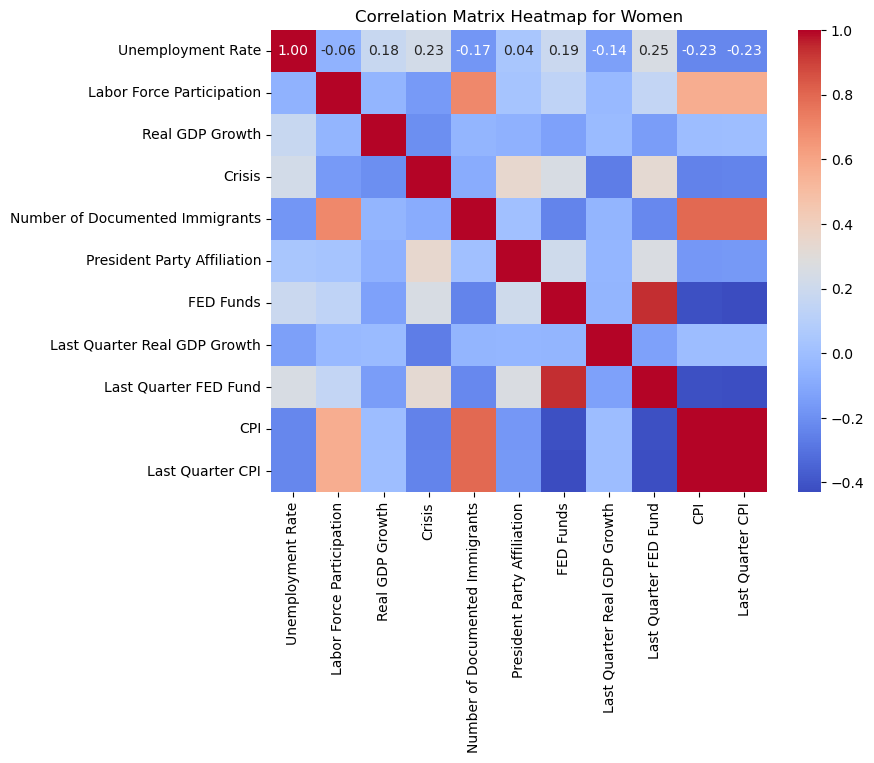

In [61]:
#correlation analysis of all variables of interest for women
subset_columns_women = ['Unemployment Rate', 'Labor Force Participation', 'Real GDP Growth','Crisis',"Number of Documented Immigrants",'President Party Affiliation', 'FED Funds','Last Quarter Real GDP Growth',
'Last Quarter FED Fund','CPI','Last Quarter CPI']

# Compute the correlation matrix for the subset of columns
correlation_matrix_women = df_women[subset_columns_women].corr()
# print("\nCorrelation matrix for women unemployment rate:")
# print(correlation_matrix_women)

#print correlation for women
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_women, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap for Women')
plt.show()

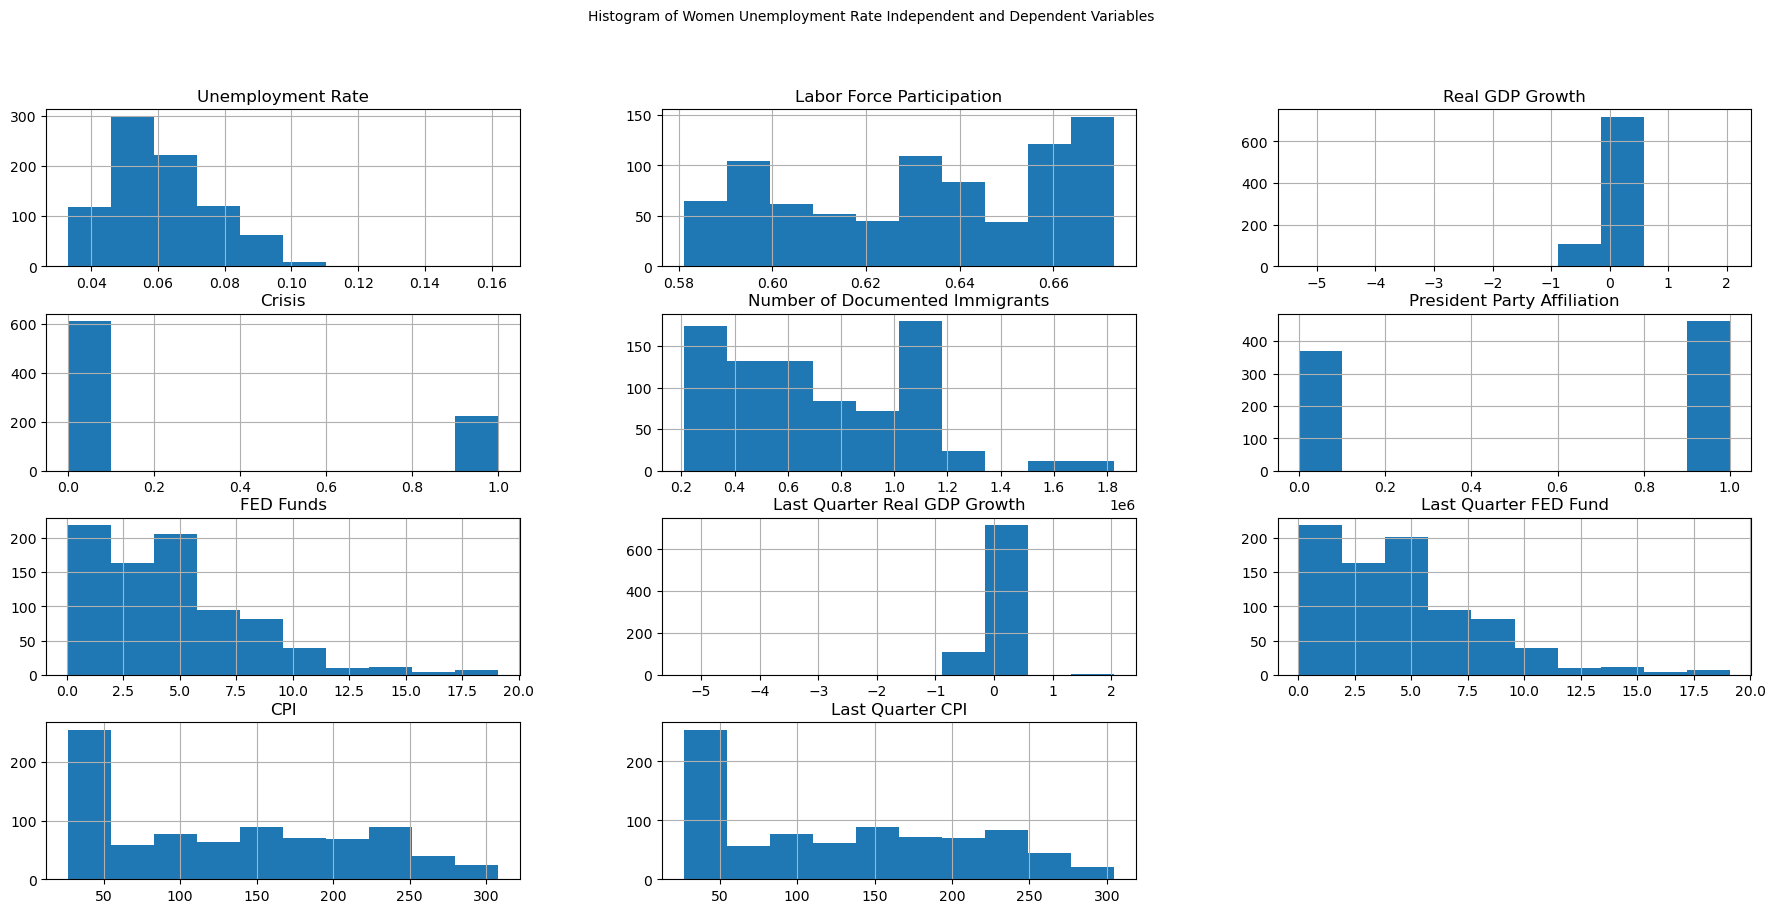

In [62]:
# Create histograms for the subset of columns to understand if any data need transformation
df_women[subset_columns_women].hist(figsize=(22, 10), bins=10)  # Adjust figsize and bins as needed

# Add titles and labels
plt.suptitle('Histogram of Women Unemployment Rate Independent and Dependent Variables', fontsize=10)
plt.xlabel('Value', fontsize=8)
plt.ylabel('Frequency', fontsize=8)

# Show the plot
plt.show()

#Many data are skewed and require transformation

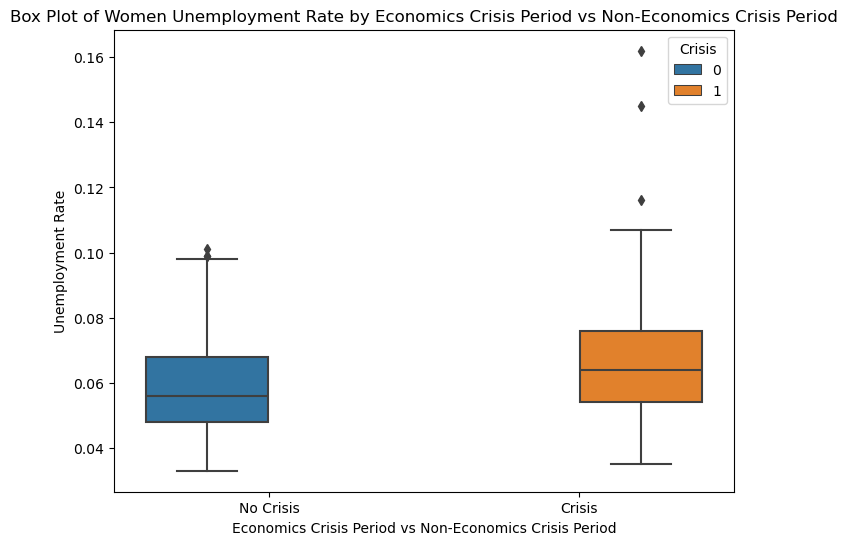

In [63]:
# Create a box plot with hue for women
plt.figure(figsize=(8, 6))
sns.boxplot(x='Crisis', y='Unemployment Rate', hue='Crisis', data=df_women)
plt.title('Box Plot of Women Unemployment Rate by Economics Crisis Period vs Non-Economics Crisis Period')
plt.xlabel('Economics Crisis Period vs Non-Economics Crisis Period')
plt.ylabel('Unemployment Rate')
# Modify the x-axis labels
new_labels = ['No Crisis', 'Crisis']
plt.xticks(ticks=[0, 1], labels=new_labels)
plt.show()
#Outlier exist and need to be removed

In [64]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) to identify outlier
Q1 = df_women['Unemployment Rate'].quantile(0.25)
Q3 = df_women['Unemployment Rate'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers 
outliers_iqr = df_women[(df_women['Unemployment Rate'] < lower_bound) | (df_women['Unemployment Rate'] > upper_bound)]

# print("\nOutliers using IQR method:")
# print(outliers_iqr)

In [65]:
#drop NA for women population for regression analysis
df_women=df_women.dropna()
nan_counts = df_women.isna().sum()
# print("Number of NaNs in each column:")
# print(nan_counts)

In [66]:
#Adding crisis interaction term 
df_women2=df_women.copy()
df_women2['Crisis_FED'] = df_women2['Crisis']*df_women2['Last Quarter FED Fund']
df_women2['Crisis_Labor'] = df_women2['Crisis']*df_women2['Labor Force Participation']
df_women2['Crisis_GDP'] = df_women2['Crisis']*df_women2['Last Quarter Real GDP Growth']
df_women2['Crisis_President'] = df_women2['Crisis']*df_women2['President Party Affiliation']
df_women2['Crisis_CPI'] = df_women2['Crisis']*df_women2['CPI']
df_women2['Crisis_LastQCPI'] = df_women2['Crisis']*df_women2['Last Quarter CPI']

In [67]:
#Drop outliers
df_women2 = df_women2[~((df_women2['Unemployment Rate'] < lower_bound) | (df_women2['Unemployment Rate'] > upper_bound))]
df_women2.head()

,Date,Unemployment Rate,Labor Force Participation,Real GDP Growth,Number of Documented Immigrants,President Party Affiliation,FED Funds,CPI,Last Quarter FED Fund,Last Quarter CPI,Crisis,Last Quarter Real GDP Growth,Crisis_FED,Crisis_Labor,Crisis_GDP,Crisis_President,Crisis_CPI,Crisis_LastQCPI
4,1954-11-01,0.056,0.586,0.452714,208177.0,1.0,0.83,26.78,0.80,26.86,1,0.182825,0.80,0.586,0.182825,1.0,26.78,26.86
5,1954-12-01,0.052,0.581,0.462691,208177.0,1.0,1.28,26.77,1.22,26.85,1,0.271374,1.22,0.581,0.271374,1.0,26.77,26.85
6,1955-01-01,0.053,0.586,0.439089,237790.0,1.0,1.39,26.77,1.07,26.81,0,0.348626,0.00,0.000,0.000000,0.0,0.00,0.00
7,1955-02-01,0.050,0.584,0.388965,237790.0,1.0,1.29,26.82,0.85,26.72,0,0.410838,0.00,0.000,0.000000,0.0,0.00,0.00
8,1955-03-01,0.048,0.585,0.329682,237790.0,1.0,1.35,26.79,0.83,26.78,0,0.452714,0.00,0.000,0.000000,0.0,0.00,0.00


In [68]:
# #Running multiple regression analysis without data transformation for women population
# X = df_women2[['Labor Force Participation','Number of Documented Immigrants','FED Funds', 'Last Quarter FED Fund','Crisis_President', 'Crisis_Labor','Last Quarter CPI']]
# X = sm.add_constant(X)
# model1_men = sm.OLS(df_women2['Unemployment Rate'], X).fit()
# # Get the residuals
# residual_men1 = model1_men.resid
# print("Multiple regression without log transformation:")
# print(model1_men.summary())
# #diagnostic for OLS Model 1
# # Q-Q plot for the model1_men residuals
# plt.figure(figsize=(8, 6))
# sm.qqplot(residual_men1, line='s')
# plt.title('Q-Q Plot of Residuals from Women Unemployment OLS Model')
# plt.show()
# # Shapiro-Wilk test for normality of residual
# shapiro_test = shapiro(residual_men1)
# print('Shapiro-Wilk Test:')
# print(f'Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}')

#Residuals are not normal

In [69]:
#Create a copy of df_women2 for log transformation
df_women3=df_women2.copy()
# df_women3.head()

In [70]:
#Log transform a subset of dependent variables
df_women3['Log_Labor Force Participation'] = np.log(df_women3['Labor Force Participation'])/10
df_women3['Log_Number of Documented Immigrants'] = np.log(df_women3['Number of Documented Immigrants'])
df_women3['Log_FED Funds'] = np.log(df_women3['FED Funds']/10)
df_women3['Log_Unemployment Rate'] = np.log(df_women3['Unemployment Rate'])
df_women3['Log_CPI'] = np.log(df_women3['CPI']/100)
df_women3['Log_Last Quarter FED Fund'] = np.log(df_women3['Last Quarter FED Fund']/10)
df_women3['Log_Last Quarter CPI'] = np.log(df_women3['Last Quarter CPI']/100)
df_women3.head()

,Date,Unemployment Rate,Labor Force Participation,Real GDP Growth,Number of Documented Immigrants,President Party Affiliation,FED Funds,CPI,Last Quarter FED Fund,Last Quarter CPI,...,Crisis_President,Crisis_CPI,Crisis_LastQCPI,Log_Labor Force Participation,Log_Number of Documented Immigrants,Log_FED Funds,Log_Unemployment Rate,Log_CPI,Log_Last Quarter FED Fund,Log_Last Quarter CPI
4,1954-11-01,0.056,0.586,0.452714,208177.0,1.0,0.83,26.78,0.80,26.86,...,1.0,26.78,26.86,-0.053444,12.246144,-2.488915,-2.882404,-1.317515,-2.525729,-1.314532
5,1954-12-01,0.052,0.581,0.462691,208177.0,1.0,1.28,26.77,1.22,26.85,...,1.0,26.77,26.85,-0.054300,12.246144,-2.055725,-2.956512,-1.317888,-2.103734,-1.314904
6,1955-01-01,0.053,0.586,0.439089,237790.0,1.0,1.39,26.77,1.07,26.81,...,0.0,0.00,0.00,-0.053444,12.379143,-1.973281,-2.937463,-1.317888,-2.234926,-1.316395
7,1955-02-01,0.050,0.584,0.388965,237790.0,1.0,1.29,26.82,0.85,26.72,...,0.0,0.00,0.00,-0.053785,12.379143,-2.047943,-2.995732,-1.316022,-2.465104,-1.319758
8,1955-03-01,0.048,0.585,0.329682,237790.0,1.0,1.35,26.79,0.83,26.78,...,0.0,0.00,0.00,-0.053614,12.379143,-2.002481,-3.036554,-1.317142,-2.488915,-1.317515


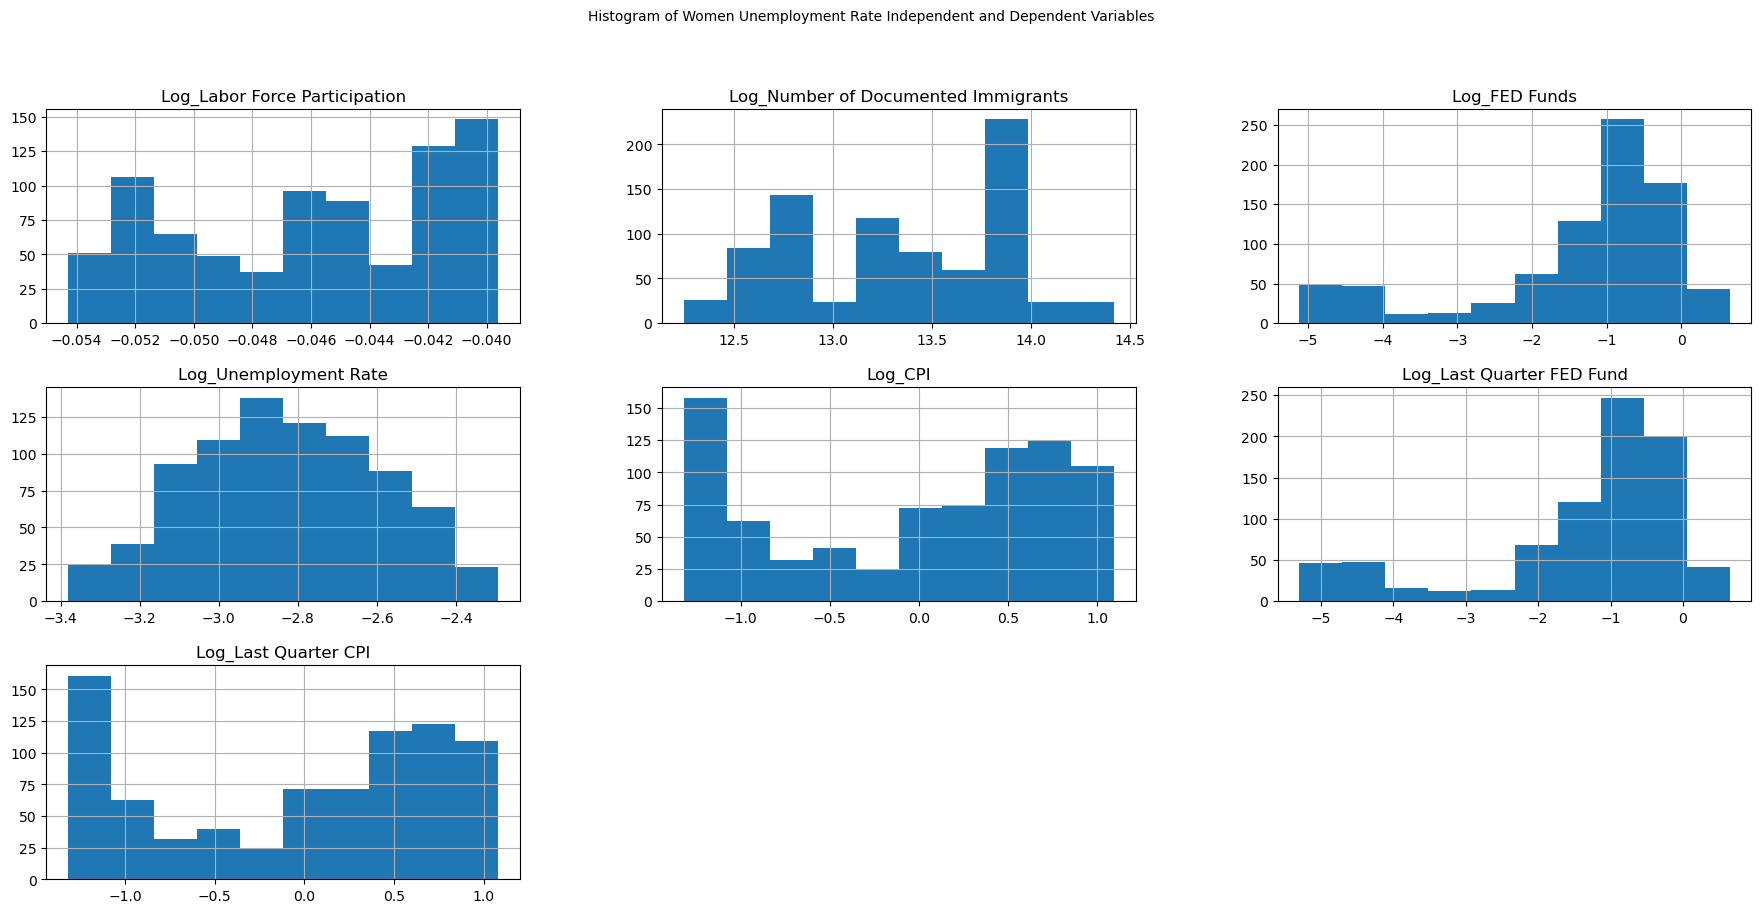

In [71]:
# Create histograms for the subset of columns to understand if any data need transformation
subset_columns_men3=['Log_Labor Force Participation','Log_Number of Documented Immigrants','Log_FED Funds','Log_Unemployment Rate','Log_CPI','Log_Last Quarter FED Fund','Log_Last Quarter CPI']
df_women3[subset_columns_men3].hist(figsize=(22, 10), bins=10)  # Adjust figsize and bins as needed

# Add titles and labels
plt.suptitle('Histogram of Women Unemployment Rate Independent and Dependent Variables', fontsize=10)
plt.xlabel('Value', fontsize=8)
plt.ylabel('Frequency', fontsize=8)

# Show the plot
plt.show()

In [72]:
#Adding crisis interaction term 
df_women3['Crisis_LogFED'] = df_women3['Crisis']*df_women3['Log_Last Quarter FED Fund']
df_women3['Crisis_LogImmig'] = df_women3['Crisis']*df_women3['Log_Number of Documented Immigrants']
df_women3['Crisis_LogCPI'] = df_women3['Crisis']*df_women3['Log_CPI']
df_women3['Crisis_LogLastQFED'] = df_women3['Crisis']*df_women3['Log_Last Quarter FED Fund'] 
df_women3['Crisis_LogLaborForce'] = df_women3['Crisis']*df_women3['Log_Labor Force Participation'] 
df_women3['Crisis_LogLastQCPI'] = df_women3['Crisis']*df_women3['Log_Last Quarter CPI']

In [73]:
df_women3.columns

Index(['Date', 'Unemployment Rate', 'Labor Force Participation',
       'Real GDP Growth', 'Number of Documented Immigrants',
       'President Party Affiliation', 'FED Funds', 'CPI',
       'Last Quarter FED Fund', 'Last Quarter CPI', 'Crisis',
       'Last Quarter Real GDP Growth', 'Crisis_FED', 'Crisis_Labor',
       'Crisis_GDP', 'Crisis_President', 'Crisis_CPI', 'Crisis_LastQCPI',
       'Log_Labor Force Participation', 'Log_Number of Documented Immigrants',
       'Log_FED Funds', 'Log_Unemployment Rate', 'Log_CPI',
       'Log_Last Quarter FED Fund', 'Log_Last Quarter CPI', 'Crisis_LogFED',
       'Crisis_LogImmig', 'Crisis_LogCPI', 'Crisis_LogLastQFED',
       'Crisis_LogLaborForce', 'Crisis_LogLastQCPI'],
      dtype='object')

In [74]:
df_women3["Prev Two Quarter Log FED Fund"] = df_women3['Log_Last Quarter FED Fund'].shift(4)
df_women3['Crisis_Log2LastQFED'] = df_women3['Crisis']*df_women3["Prev Two Quarter Log FED Fund"] 
#drop NA for women population for regression analysis
df_women3=df_women3.dropna()
df_women3.columns


Index(['Date', 'Unemployment Rate', 'Labor Force Participation',
       'Real GDP Growth', 'Number of Documented Immigrants',
       'President Party Affiliation', 'FED Funds', 'CPI',
       'Last Quarter FED Fund', 'Last Quarter CPI', 'Crisis',
       'Last Quarter Real GDP Growth', 'Crisis_FED', 'Crisis_Labor',
       'Crisis_GDP', 'Crisis_President', 'Crisis_CPI', 'Crisis_LastQCPI',
       'Log_Labor Force Participation', 'Log_Number of Documented Immigrants',
       'Log_FED Funds', 'Log_Unemployment Rate', 'Log_CPI',
       'Log_Last Quarter FED Fund', 'Log_Last Quarter CPI', 'Crisis_LogFED',
       'Crisis_LogImmig', 'Crisis_LogCPI', 'Crisis_LogLastQFED',
       'Crisis_LogLaborForce', 'Crisis_LogLastQCPI',
       'Prev Two Quarter Log FED Fund', 'Crisis_Log2LastQFED'],
      dtype='object')

In [78]:
#Running multiple regression analysis without data transformation for women population
X = df_women3[['Log_Labor Force Participation','Log_Number of Documented Immigrants','Log_Last Quarter FED Fund',  'Crisis_LogImmig','Crisis_Log2LastQFED', 
'Crisis_LogLastQFED','Prev Two Quarter Log FED Fund','President Party Affiliation','Crisis_LogLaborForce']]
X = sm.add_constant(X)
model2_women = sm.OLS(df_women3['Log_Unemployment Rate'], X).fit()
# Get the residuals
residual_women2 = model2_women.resid
print("Multiple regression without log transformation:")
print(model2_women.summary())

# X = df_women3[['Log_Labor Force Participation','Log_Number of Documented Immigrants','Log_Last Quarter FED Fund',  'Crisis_LogImmig','Crisis_Log2LastQFED', 
# 'Crisis_LogLastQFED','Prev Two Quarter Log FED Fund','President Party Affiliation','Crisis_LogLaborForce']]

Multiple regression without log transformation:
                              OLS Regression Results                             
Dep. Variable:     Log_Unemployment Rate   R-squared:                       0.197
Model:                               OLS   Adj. R-squared:                  0.188
Method:                    Least Squares   F-statistic:                     21.75
Date:                   Wed, 12 Jun 2024   Prob (F-statistic):           3.76e-33
Time:                           20:25:10   Log-Likelihood:                 104.40
No. Observations:                    808   AIC:                            -188.8
Df Residuals:                        798   BIC:                            -141.8
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [79]:
# Shapiro-Wilk test for normality of residual
shapiro_test = shapiro(residual_women2)
print('Shapiro-Wilk Test:')
print(f'Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}')

Shapiro-Wilk Test:
Statistic: 0.9932901990164386, p-value: 0.0010886559066923618


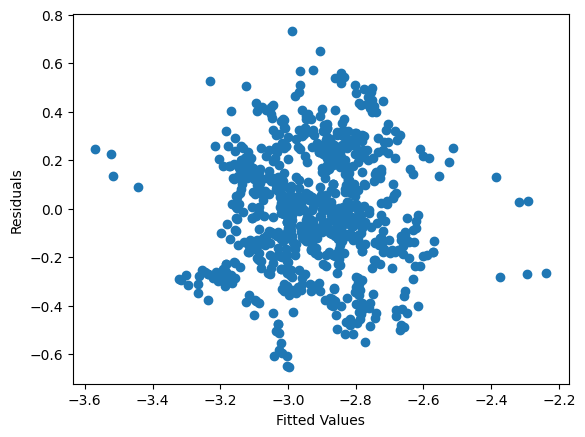

In [ ]:
#Ensure that the residuals have constant variance (homoscedasticity).
# Residuals vs. Fitted values plot
plt.scatter(model2_women.fittedvalues, model2_women.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [ ]:
#Ensure residuals are independent
from statsmodels.stats.stattools import durbin_watson

dw_test = durbin_watson(model2_women.resid)
print('Durbin-Watson Test:', dw_test)

#Confirm residuals are independent

Durbin-Watson Test: 0.10434740196331176


In [ ]:
#merge all data for all women 
df_women= pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(unemployment_women, gdp_data, on = "YearMonth" ),laborforce_data, on = "YearMonth"),cpi_data, on = "YearMonth"),monthly_immig_data, on = "YearMonth", how = "left"),president_data, on = "YearMonth"),fedfund_data,on = "YearMonth")
df_women.head()

,DATE,LNS14000002,YearMonth,USALORSGPNOSTSAM,USALORSGPNOSTSAM1,Labor Force Participation,CPI,NUMBER OF DOCUMENTED IMMIGRANTS,President Party Affiliation,FEDFUNDS
0,1954-07-01,6.3,1954-07-01,97.80396,97.98277,58.4,26.86,208177.0,1.0,0.80
1,1954-08-01,6.2,1954-08-01,97.98277,98.24867,58.7,26.85,208177.0,1.0,1.22
2,1954-09-01,6.4,1954-09-01,98.24867,98.59119,59.2,26.81,208177.0,1.0,1.07
3,1954-10-01,5.8,1954-10-01,98.59119,98.99624,58.8,26.72,208177.0,1.0,0.85
4,1954-11-01,5.6,1954-11-01,98.99624,99.44441,58.6,26.78,208177.0,1.0,0.83


In [ ]:
#normalize GDP via CPI, and other data
df_women["Real GDP"] = df_women['USALORSGPNOSTSAM'] / df_women['CPI']
df_women["Real GDP1"] = df_women['USALORSGPNOSTSAM1'] / df_women['CPI']
df_women["Real GDP Growth"] = (df_women["Real GDP1"] - df_women["Real GDP"])/df_women["Real GDP"]*100
df_women=df_women[['YearMonth', 'LNS14000002','Labor Force Participation','Real GDP Growth',"NUMBER OF DOCUMENTED IMMIGRANTS",'President Party Affiliation','FEDFUNDS']]
#scale labor force and umemployment data
df_women['Labor Force Participation'] = df_women['Labor Force Participation']/100
df_women['LNS14000002'] = df_women['LNS14000002']/100
#add one month lagged real GDP growth
df_women["Lagged Real GDP Growth"]= df_women['Real GDP Growth'].shift(1)
df_women.head()

,YearMonth,LNS14000002,Labor Force Participation,Real GDP Growth,NUMBER OF DOCUMENTED IMMIGRANTS,President Party Affiliation,FEDFUNDS,Lagged Real GDP Growth
0,1954-07-01,0.063,0.584,0.182825,208177.0,1.0,0.80,NaN
1,1954-08-01,0.062,0.587,0.271374,208177.0,1.0,1.22,0.182825
2,1954-09-01,0.064,0.592,0.348626,208177.0,1.0,1.07,0.271374
3,1954-10-01,0.058,0.588,0.410838,208177.0,1.0,0.85,0.348626
4,1954-11-01,0.056,0.586,0.452714,208177.0,1.0,0.83,0.410838


In [ ]:
#change project 1 women dataset name
df_women.rename(columns={'YearMonth': 'Date', 'LNS14000002': 'Unemployment Rate', 'Labor Force Participation':'Labor Force Participation',
                    'Real GDP Growth':'Real GDP Growth', "Lagged Real GDP Growth":"Lagged Real GDP Growth","NUMBER OF DOCUMENTED IMMIGRANTS": "Number of Documented Immigrants",'President Party Affiliation':'President Party Affiliation','FEDFUNDS':'FED Funds'}, inplace=True)
df_women.head()

,Date,Unemployment Rate,Labor Force Participation,Real GDP Growth,Number of Documented Immigrants,President Party Affiliation,FED Funds,Lagged Real GDP Growth
0,1954-07-01,0.063,0.584,0.182825,208177.0,1.0,0.80,NaN
1,1954-08-01,0.062,0.587,0.271374,208177.0,1.0,1.22,0.182825
2,1954-09-01,0.064,0.592,0.348626,208177.0,1.0,1.07,0.271374
3,1954-10-01,0.058,0.588,0.410838,208177.0,1.0,0.85,0.348626
4,1954-11-01,0.056,0.586,0.452714,208177.0,1.0,0.83,0.410838


In [ ]:
#Create a US economic crisis column with dummy variable =1 if crisis and 0 otherwise
df_women['Year'] = df_women['Date'].dt.year

# Define the years considered as crisis years
crisis_years = [1948, 1949, 1953,1954,1957,1958,1960,1961,1969,1970,1973,1974,1975,1980,1981,1982,1990,1991,2001,2008,2009,2020]

# Create a new column 'Crisis' and set values based on the year
df_women['Crisis'] = df_women['Year'].apply(lambda x: 1 if x in crisis_years else 0)

# Display the DataFrame
df_women.head()

,Date,Unemployment Rate,Labor Force Participation,Real GDP Growth,Number of Documented Immigrants,President Party Affiliation,FED Funds,Lagged Real GDP Growth,Year,Crisis
0,1954-07-01,0.063,0.584,0.182825,208177.0,1.0,0.80,NaN,1954,1
1,1954-08-01,0.062,0.587,0.271374,208177.0,1.0,1.22,0.182825,1954,1
2,1954-09-01,0.064,0.592,0.348626,208177.0,1.0,1.07,0.271374,1954,1
3,1954-10-01,0.058,0.588,0.410838,208177.0,1.0,0.85,0.348626,1954,1
4,1954-11-01,0.056,0.586,0.452714,208177.0,1.0,0.83,0.410838,1954,1


In [ ]:
#correlation analysis of all variables of interest for women
subset_columns_women = ['Unemployment Rate', 'Labor Force Participation', 'Real GDP Growth','Lagged Real GDP Growth','Crisis','President Party Affiliation', 'FED Funds']

# Compute the correlation matrix for the subset of columns
correlation_matrix_women = df_women[subset_columns_women].corr()
print("\nCorrelation matrix for unemployment rate and economics indicator:")
print(correlation_matrix_women)


Correlation matrix for unemployment rate and economics indicator:
                             Unemployment Rate  Labor Force Participation  \
Unemployment Rate                     1.000000                  -0.056900   
Labor Force Participation            -0.056900                   1.000000   
Real GDP Growth                       0.178060                  -0.049154   
Lagged Real GDP Growth                0.037076                  -0.032941   
Crisis                                0.225898                  -0.161489   
President Party Affiliation           0.043588                   0.030440   
FED Funds                             0.189037                   0.134269   

                             Real GDP Growth  Lagged Real GDP Growth  \
Unemployment Rate                   0.178060                0.037076   
Labor Force Participation          -0.049154               -0.032941   
Real GDP Growth                     1.000000                0.619575   
Lagged Real GDP Growth      

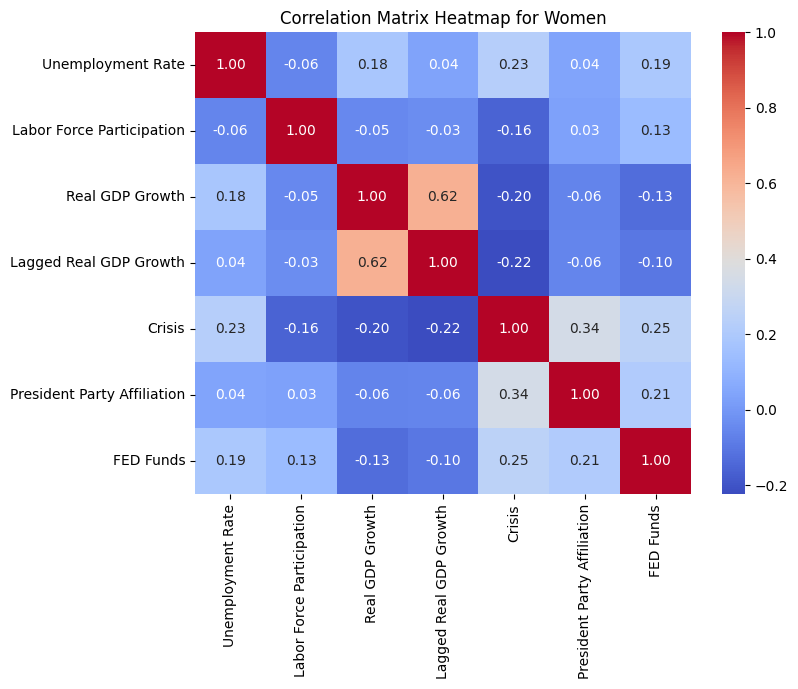

In [ ]:
#print correlation 
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_women, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap for Women')
plt.show()

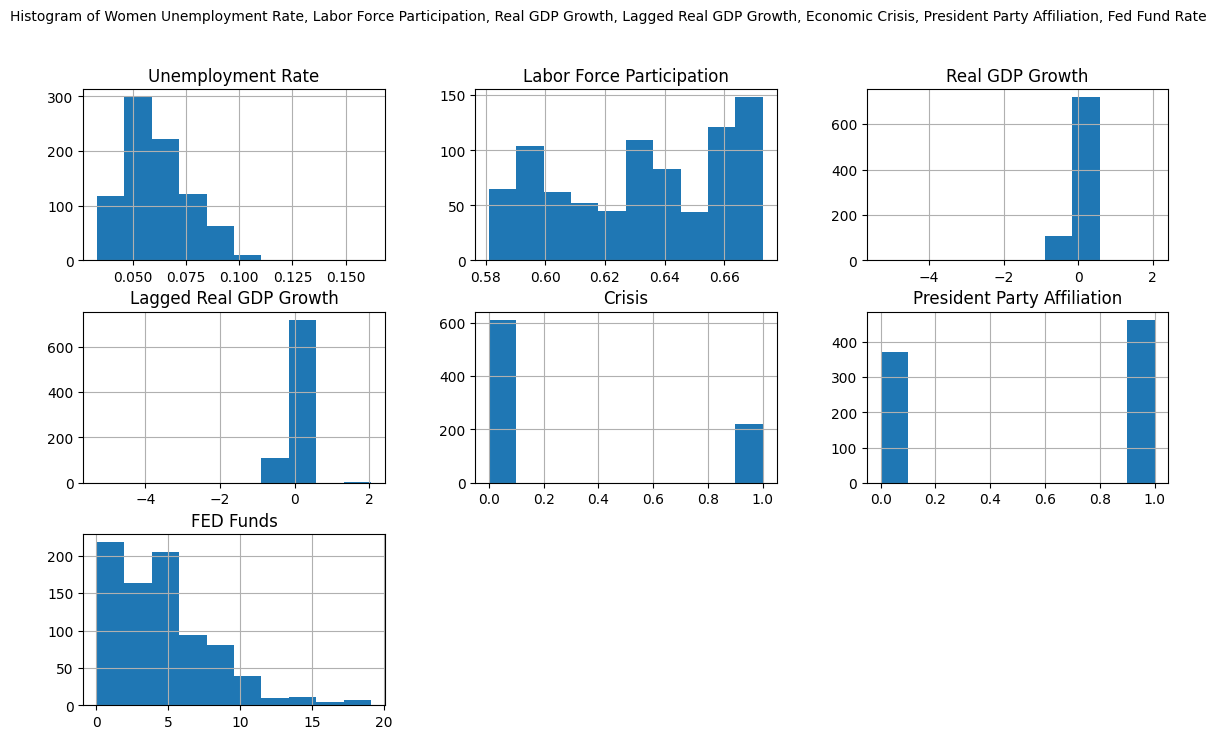

In [ ]:
# Create histograms for the subset of columns to understand if any data need transformation
df_women[subset_columns_women].hist(figsize=(14, 8), bins=10)  # Adjust figsize and bins as needed

# Add titles and labels
plt.suptitle('Histogram of Women Unemployment Rate, Labor Force Participation, Real GDP Growth, Lagged Real GDP Growth, Economic Crisis, President Party Affiliation, Fed Fund Rate', fontsize=10)
plt.xlabel('Value', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

# Show the plot
plt.show()

#Many data are skewed and require transformation

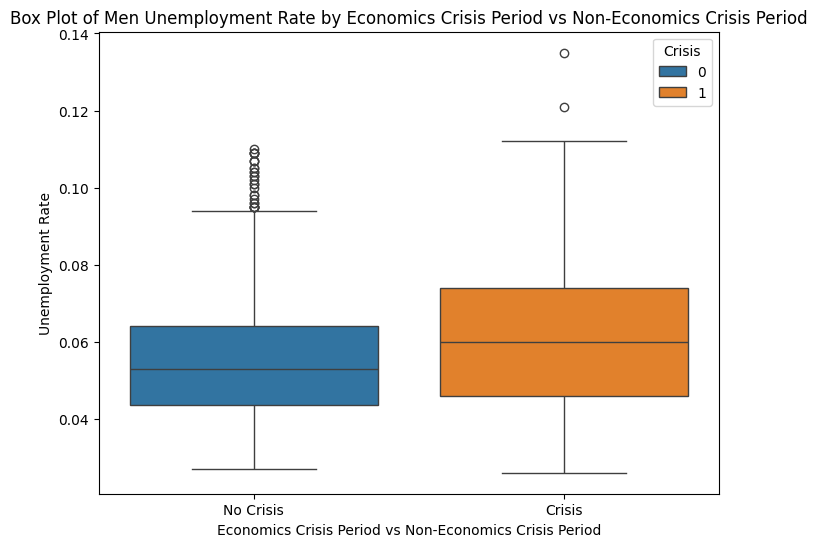

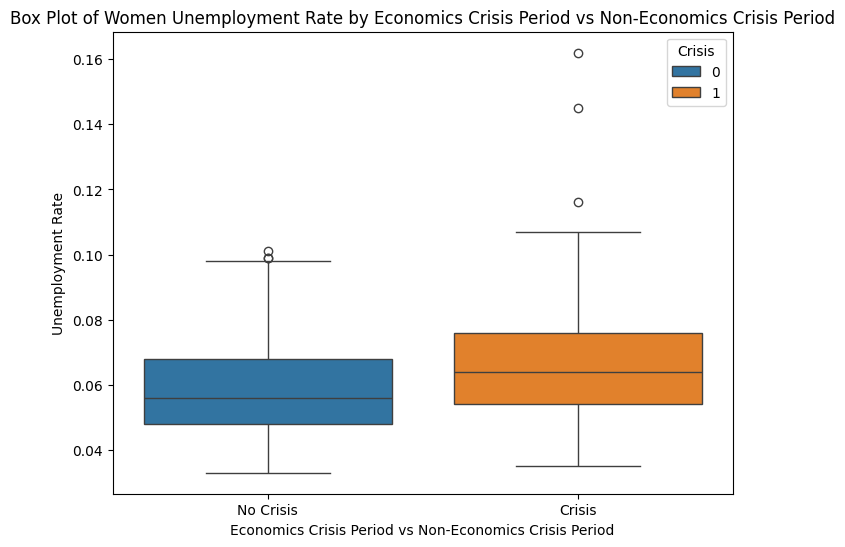

In [ ]:
# Create a box plot with hue for women
plt.figure(figsize=(8, 6))
sns.boxplot(x='Crisis', y='Unemployment Rate', hue='Crisis', data=df_women)
plt.title('Box Plot of Women Unemployment Rate by Economics Crisis Period vs Non-Economics Crisis Period')
plt.xlabel('Economics Crisis Period vs Non-Economics Crisis Period')
plt.ylabel('Unemployment Rate')
# Modify the x-axis labels
new_labels = ['No Crisis', 'Crisis']
plt.xticks(ticks=[0, 1], labels=new_labels)
plt.show()

Shapiro-Wilk Test:
Statistic: 0.9533374454453448, p-value: 1.8272200577097693e-15


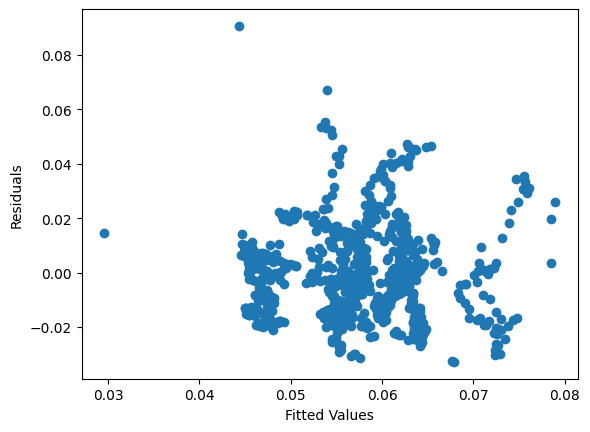

Breusch-Pagan Test: (36.54207637665046, 7.398466870437769e-07, 7.592961037198872, 5.524404548168934e-07)


Durbin-Watson Test: 0.0690565781728417


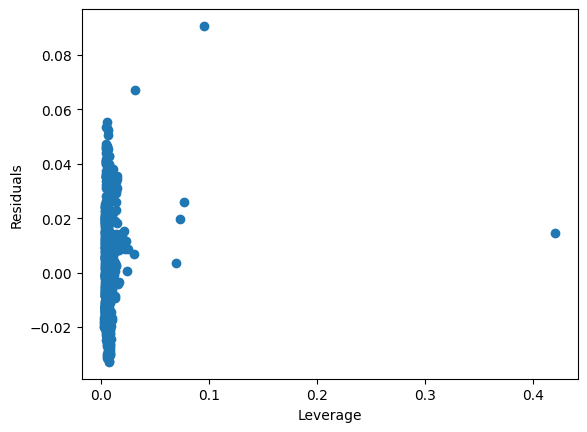

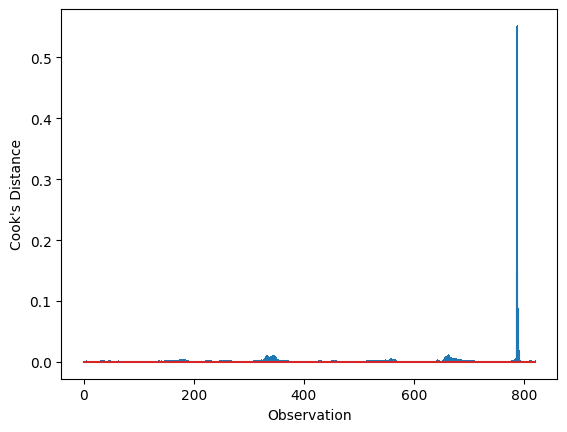

In [ ]:

# X = np.log(df_women[['Labor Force Participation', 'Real GDP Growth','Lagged Real GDP Growth','Crisis']])
# model2_women = sm.OLS(df_women['Y'], X).fit()
# print("\nMultiple regression with log transformation for X1:")
# print(model2_women.summary())


In [ ]:
#drop NA for women population for regression analysis
df_women=df_women.dropna()
nan_counts = df_women.isna().sum()

print("Number of NaNs in each column:")
print(nan_counts)

Number of NaNs in each column:
Date                               0
Unemployment Rate                  0
Labor Force Participation          0
Real GDP Growth                    0
Number of Documented Immigrants    0
President Party Affiliation        0
FED Funds                          0
Lagged Real GDP Growth             0
Year                               0
Crisis                             0
dtype: int64


In [ ]:
#Running multiple regression analysis without data transformation for women population
X = df_women[['Labor Force Participation','Lagged Real GDP Growth','Crisis','President Party Affiliation', 'FED Funds']]
X = sm.add_constant(X)
model1_women = sm.OLS(df_women['Unemployment Rate'], X).fit()
residual_women = model1_women.resid
print("Multiple regression without log transformation:")
print(model1_women.summary())

Multiple regression without log transformation:
                            OLS Regression Results                            
Dep. Variable:      Unemployment Rate   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     15.53
Date:                Mon, 10 Jun 2024   Prob (F-statistic):           1.29e-14
Time:                        21:05:04   Log-Likelihood:                 2298.5
No. Observations:                 821   AIC:                            -4585.
Df Residuals:                     815   BIC:                            -4557.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

<Figure size 800x600 with 0 Axes>

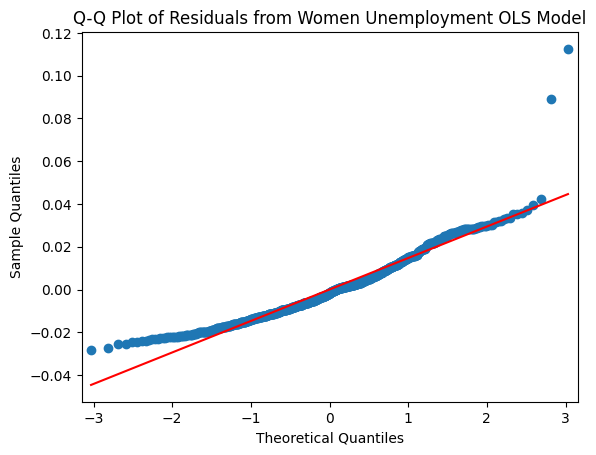

In [ ]:
# Q-Q plot for the model1_men residuals
plt.figure(figsize=(8, 6))
sm.qqplot(residual_women, line='s')
plt.title('Q-Q Plot of Residuals from Women Unemployment OLS Model')
plt.show()

In [ ]:
# Shapiro-Wilk test for normality
shapiro_test = shapiro(residual_women)
print('Shapiro-Wilk Test:')
print(f'Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}')


Shapiro-Wilk Test:
Statistic: 0.9356173474904064, p-value: 2.4232967155984886e-18


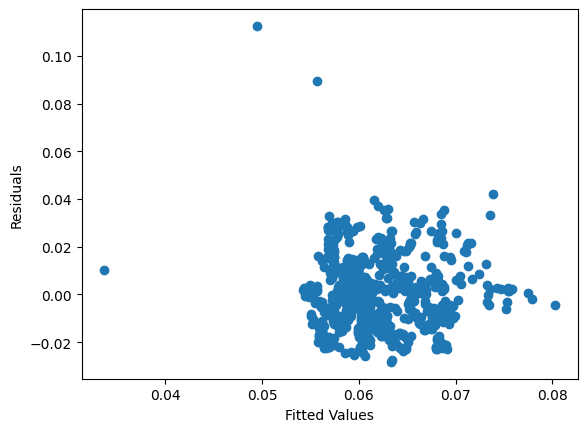

Breusch-Pagan Test: (61.15727299317319, 7.006198127816126e-12, 13.119340547162556, 2.6390114246249666e-12)


In [ ]:
#Ensure that the residuals have constant variance (homoscedasticity).
# Residuals vs. Fitted values plot
plt.scatter(model1_women.fittedvalues, model1_women.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Breusch-Pagan Test
bp_test = het_breuschpagan(model1_women.resid, model1_women.model.exog)
print('Breusch-Pagan Test:', bp_test)

In [ ]:
#Ensure residuals are independent
from statsmodels.stats.stattools import durbin_watson

dw_test = durbin_watson(model1_women.resid)
print('Durbin-Watson Test:', dw_test)

Durbin-Watson Test: 0.11719132432086807


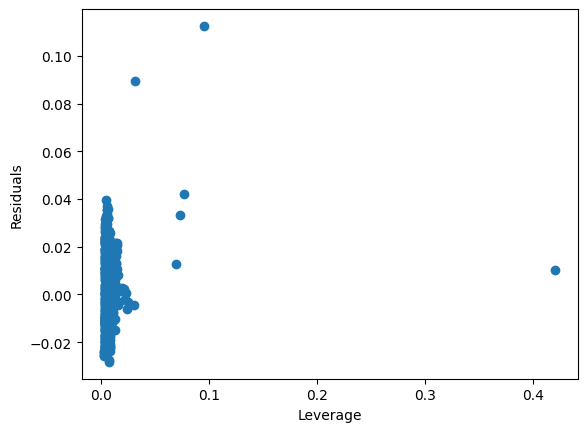

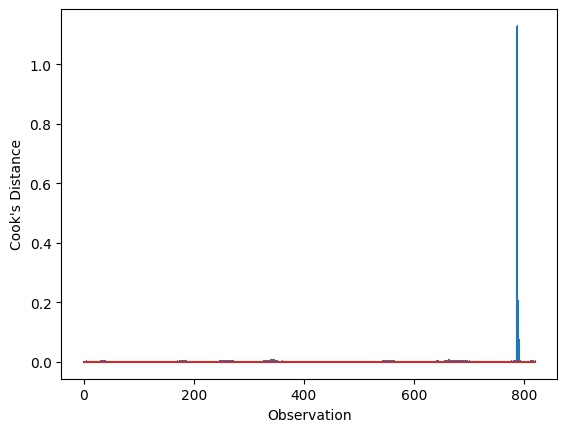

In [ ]:
#Check for outliers and their influences
influence = model1_women.get_influence()
leverage = influence.hat_matrix_diag
cooks_d = influence.cooks_distance[0]

# Plot leverage vs. residuals
plt.scatter(leverage, model1_women.resid)
plt.xlabel('Leverage')
plt.ylabel('Residuals')
plt.show()

# Plot Cook's distance
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.xlabel('Observation')
plt.ylabel("Cook's Distance")
plt.show()

## Total Population Summary

In [ ]:
#merge all data for all population
df_all= pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(unemployment_df, gdp_data, on = "YearMonth" ),laborforce_data, on = "YearMonth"),cpi_data, on = "YearMonth"),monthly_edu_data, on = "YearMonth"),monthly_immig_data, on = "YearMonth"),president_data, on = "YearMonth"),fedfund_data,on = "YearMonth")
df_all.head()

In [ ]:
#normalize GDP via CPI
df_all["Real GDP"] = df_all['USALORSGPNOSTSAM'] / df_all['CPI']
df_all["Real GDP1"] = df_all['USALORSGPNOSTSAM1'] / df_all['CPI']
df_all["Real GDP Growth"] = (df_all["Real GDP1"] - df_all["Real GDP"])/df_all["Real GDP"]*100
df_all=df_all[['YearMonth', 'Unemployment Rate','Labor Force Participation','Real GDP Growth', '% Highest degree is middle school', '% Highest degree is High School', '% Highest degree is  College (4 + years)' ,'NUMBER OF DOCUMENTED IMMIGRANTS','President Party Affiliation','FEDFUNDS']]
#scale labor force and umemployment data
df_all['Labor Force Participation'] = df_all['Labor Force Participation']/100
df_all['Unemployment Rate'] = df_all['Unemployment Rate']/100
#add one month lagged real GDP growth
df_all["Lagged Real GDP Growth"]= df_all['Real GDP Growth'].shift(1)
df_all.head()

In [ ]:
#change project 1 dataset name
df_all.rename(columns={'YearMonth': 'Date', 'Unemployment Rate': 'Unemployment Rate', 'Labor Force Participation':'Labor Force Participation',
                    'Real GDP Growth':'Real GDP Growth', '% Highest degree is middle school': "Middle School Degree%",'% Highest degree is High School': "High School Degree%",
                    '% Highest degree is  College (4 + years)': "College Degree%", "Lagged Real GDP Growth":"Lagged Real GDP Growth",'President Party Affiliation':'President Party Affiliation','NUMBER OF DOCUMENTED IMMIGRANTS':'Number of Documented Immigrants','FEDFUNDS':'FED Funds'}, inplace=True)
df_all.head()

In [ ]:
#Create a US economic crisis column with dummy variable =1 if crisis and 0 otherwise
df_all['Year'] = df_all['Date'].dt.year

# Define the years considered as crisis years
crisis_years = [1948, 1949, 1953,1954,1957,1958,1960,1961,1969,1970,1973,1974,1975,1980,1981,1982,1990,1991,2001,2008,2009,2020]

# Create a new column 'Crisis' and set values based on the year
df_all['Crisis'] = df_all['Year'].apply(lambda x: 1 if x in crisis_years else 0)

# Display the DataFrame
df_all.head()


In [ ]:
#correlation analysis of all variables of interest
subset_columns = ['Unemployment Rate', 'Labor Force Participation', 'Real GDP Growth','Lagged Real GDP Growth','Middle School Degree%',
                  'High School Degree%', 'College Degree%','Crisis','Number of Documented Immigrants','President Party Affiliation','FED Funds']

# Compute the correlation matrix for the subset of columns
correlation_matrix = df_all[subset_columns].corr()
print("\nCorrelation matrix for unemployment rate and economics indicator:")
print(correlation_matrix)

In [ ]:
#print correlation 
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# Create histograms for the subset of columns to understand if any data need transformation
df_all[subset_columns].hist(figsize=(14, 8), bins=10)  # Adjust figsize and bins as needed

# Add titles and labels
plt.suptitle('Histogram of Unemployment Rate, Labor Force Participation, Real GDP Growth, Lagged Real GDP Growth, Middle School Degree%, High School Degree%, College Degree%, Economic Crisis, President Party Affiliation, Fed Fund Rate', fontsize=10)
plt.xlabel('Value', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

# Show the plot
plt.show()

#Many data are skewed and require transformation

In [ ]:
# Create a box plot with hue
plt.figure(figsize=(8, 6))
sns.boxplot(x='Crisis', y='Unemployment Rate', hue='Crisis', data=df_all)
plt.title('Box Plot of Unemployment Rate by Economics Crisis Period vs Non-Economics Crisis Period')
plt.xlabel('Economics Crisis Period vs Non-Economics Crisis Period')
plt.ylabel('Unemployment Rate')
# Modify the x-axis labels
new_labels = ['No Crisis', 'Crisis']
plt.xticks(ticks=[0, 1], labels=new_labels)
plt.show()